In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

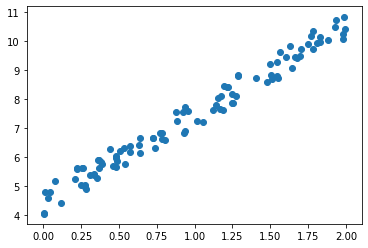

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.48158574],
       [3.01456249]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.48158574],
       [10.51071072]])

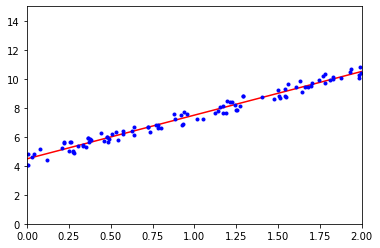

In [5]:
plt.plot(X_new,y_predict, 'r-')
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
n_epochs = 50
t0,t1 = 5,50
m = 100
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.4897639],
       [3.017889 ]])

In [7]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
print(sgd_reg.intercept_,sgd_reg.coef_)

[4.48756183] [3.03245632]


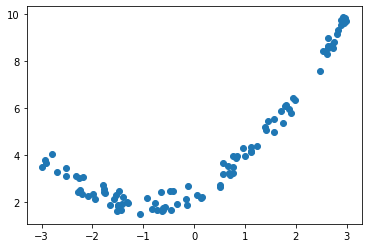

In [8]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)
plt.scatter(X,y)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0],X_poly[0])

[0.69565439] [0.69565439 0.48393503]


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)

[2.43724168] [[1.00742454 0.50312954]]


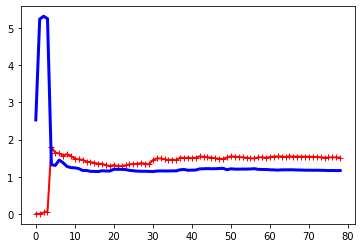

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_error, val_error = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(y_train[:m],y_train_predict))
        val_error.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_error),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_error),"b-",linewidth=3,label="val")

lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)

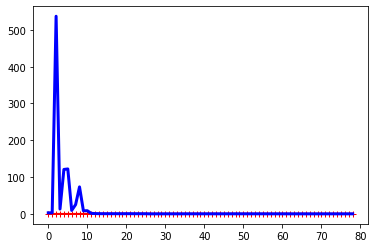

In [12]:
from sklearn.pipeline import Pipeline
polynominal_regression = Pipeline([
    ("poly_feature", PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curve(polynominal_regression,X,y)

In [13]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
print("Ridge:",ridge_reg.predict([[1.5]]))

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
print("SGD:",sgd_reg.predict([[1.5]]))

Ridge: [[5.77593998]]
SGD: [5.76691001]


In [15]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
print("Lasso:",lasso_reg.predict([[1.5]]))

Lasso: [5.73770272]


In [16]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
print("ElasticNet:",elastic_net.predict([[1.5]]))

ElasticNet: [5.73502222]


In [21]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.2)
# prepare the data 
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler())
])
X_train_poly_scaler = poly_scaler.fit_transform(X_train)
X_val_poly_scaler = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=np.infty, warm_start=True, 
                       penalty=None, learning_rate="constant", eta0=0.0005)
minimun_val_error = float("inf")
best_epch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaler,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaler)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimun_val_error:
        minimun_val_error = val_error
        best_epch = epoch
        best_model = clone(sgd_reg)

/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to

/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to

/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to

/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to

In [22]:
print("minimun_val_error:",minimun_val_error,"\nbest_epch:",best_epch,"\nbest_model:",best_model)

minimun_val_error: 0.10862181744095786 
best_epch: 998 
best_model: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=inf, validation_fraction=0.1, verbose=0,
             warm_start=True)
